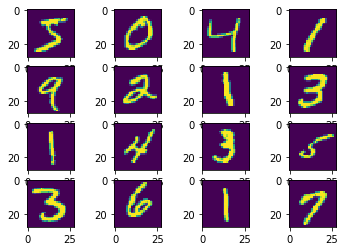

In [2]:
import os
import numpy as np
from keras.datasets import mnist

# load data and reshape the Tensors
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype(np.float32).reshape((X_train.shape[0],28,28)) / 255.0
X_test  = X_test.astype(np.float32).reshape((X_test.shape[0],28,28)) / 255.0

# convert class vectors to binary class matrices
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

import matplotlib.pyplot as plt
for i in range(16):
  plt.subplot(4,4,i+1)
#   plt.axis('off')
  plt.imshow(X_train[i].reshape((28,28)))
plt.show()

In [5]:
from keras.layers import (Conv2D, BatchNormalization, Activation, Flatten)
from keras import Sequential
from keras.layers import Dense

# Build a model with 14 output nodes
model = Sequential()

model.add( Conv2D(8, (3,3), padding='same', input_shape=(28,28,1)))
model.add( BatchNormalization() )
model.add( Activation('relu') )


model.add( Conv2D(8, (3,3), strides=(2,2), padding='same') ) # -> 14,14,8
model.add( BatchNormalization() )
model.add( Activation('relu') )

model.add( Conv2D(8, (3,3), strides=(2,2), padding='same')) # -> 7,7,8
model.add( BatchNormalization() )
model.add( Activation('relu') )

model.add( Flatten() )

model.add( Dense(10, activation='softmax') )
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

model.fit(X_train.reshape((X_train.shape[0],28,28,1)), Y_train, batch_size=32, epochs=5, 
          validation_data=(X_test.reshape((X_test.shape[0],28,28,1)),Y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 8)         32        
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 8)         584       
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 8)         32        
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 8)          